In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd
from scipy.optimize import curve_fit
from matplotlib import rc


In [2]:
plt.rcParams['font.size'] = 12 # Adjust as needed
plt.rcParams['legend.fontsize'] = 12 # Adjust as needed
plt.rcParams['axes.labelsize'] = 12 # Adjust as needed
plt.rcParams['font.family'] = 'serif' # Adjust as needed



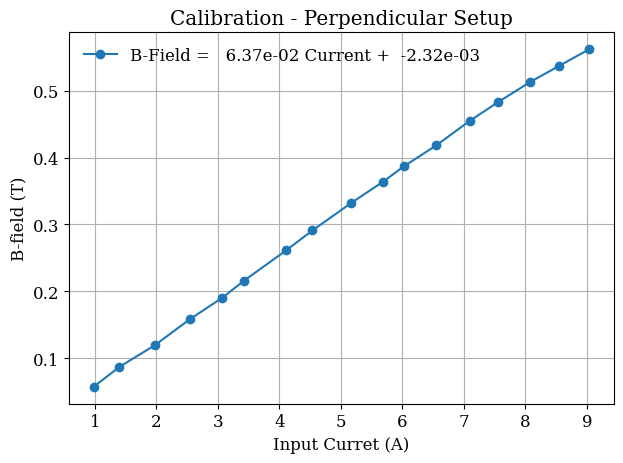

In [3]:

# Calibration of the B field OLD SETUP
Amps = [0.98,1.4,1.98,2.55,3.07,3.43,4.11,4.54,5.17,5.69,6.03,6.55,7.10,7.56,8.08,8.55,9.04]
Bfield = [-57,-86.8,-119.5,-158.4,-190,-216,-261,-291,-332,-364,-387,-418,-455,-483,-513,-537,-562] # +- 2 mT
aB_slopes, aB_intercept = np.polyfit(Amps, -1*np.array(Bfield)/1000, 1)

Bfield_err = 0.1
plt.figure()
plt.grid()
plt.plot(Amps,-1*np.array(Bfield)/1000.,'-o', label=f"B-Field = {aB_slopes:10.2e} Current + {aB_intercept:10.2e}")
plt.title("Calibration - Perpendicular Setup")
plt.xlabel("Input Curret (A)")
plt.ylabel("B-field (T)")
plt.legend(frameon=False)
plt.tight_layout()

plt.savefig('bfieldcal-perp.png')

def amp_to_bfield_perp(amp):
    return amp * aB_slopes + aB_intercept


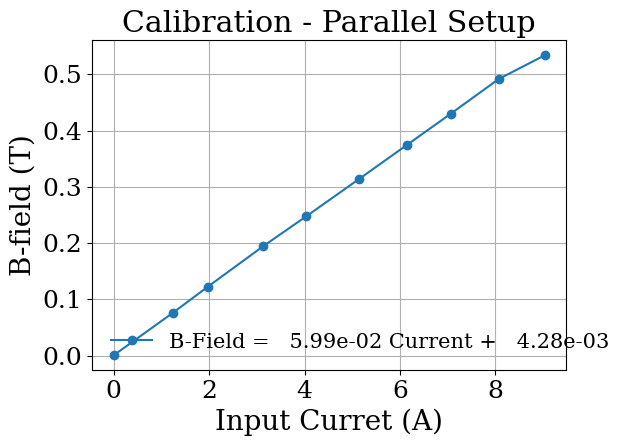

In [201]:

# NEW setup B-FIELD !!!
Amps = [0,1.25,1.98,3.14,4.04,5.14,6.15,7.06,8.07,9.03]
Bfield = [0.58,76.7,123,195,248,314,375,430,492,534] #=-1
aB_slopes_new, aB_intercept_new = np.polyfit(Amps, np.array(Bfield)/1000, 1)

plt.figure()

plt.grid()
plt.plot(Amps,np.array(Bfield)/1000,'-o', label=f"B-Field = {aB_slopes_new:10.2e} Current + {aB_intercept_new:10.2e}")
plt.title("Calibration - Parallel Setup")
plt.xlabel("Input Curret (A)")
plt.ylabel("B-field (T)")
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('bfieldcal-para.png')

def amp_to_bfield_perp_new(amp):
    return amp * aB_slopes_new + aB_intercept_new


In [5]:
def prop_error(err1, err2):
    return np.sqrt(err1**2 + err2**2)

In [6]:
df = pd.read_csv('peaks-perp.csv')


In [7]:
df

,peaks,sigmas,xcenter,amps,pangle
0,"[303.86382748231614, 310.3559429685437, 353.47...","[5.4739243230351216, 3.6683465701408613, 8.121...",226.367009,296,0
1,"[302.85292262205616, 313.420411541703, 351.777...","[5.7837028221772835, 3.425342599490278, 4.4416...",233.087738,411,0
2,"[307.83956854196634, 356.65860866051264, 394.5...","[2.8704865425167454, 2.3729495801567855, 2.391...",212.497477,907,90
3,"[301.7978287056233, 351.2407280797234, 388.776...","[5.996046886636706, 5.013011231387866, 4.22387...",217.897715,204,0
4,"[299.88245076006746, 348.7470759211047, 386.41...","[3.499685190015154, 2.961895180074658, 2.10769...",206.873234,623,90
5,"[299.09968712844454, 347.8579907116972, 385.94...","[3.1110050792298862, 2.7583992417591285, 2.175...",204.621194,517,90
6,"[311.39967290720733, 360.3484677360439, 397.96...","[3.567863295053314, 3.0138953306957776, 2.2099...",217.530843,204,90
7,"[314.7356604805091, 363.16744335098736, 401.29...","[3.3463940637956506, 2.352271194315433, 2.3739...",219.946342,113,90
8,"[319.0029473150172, 367.5874966433392, 405.514...","[3.8845717932116997, 2.355930904355503, 2.4175...",225.996646,411,90
9,"[287.4504468518854, 312.18768007497863, 339.08...","[7.078803686539913, 3.7584913946985834, 3.3494...",239.333064,812,0


In [8]:
plt.figure()
# dists01 = [json.loads(df['peaks'][inds][i])[0]-df['xcenter'][inds][i] for i in df.index[inds]]
# err01 = [prop_error(json.loads(df['sigmas'][inds][i])[0],5) for i in df.index[inds]]
# plt.errorbar(amps,dists01,yerr=err01,marker='o',ls='',label = 'to central ring')

n=1
for line in range(0,10,1):
    dist = [json.loads(df['peaks'][inds][i])[line+n]-json.loads(df['peaks'][inds][i])[line] for i in df.index[inds]]
    err = [prop_error(json.loads(df['sigmas'][inds][i])[line+n],json.loads(df['sigmas'][inds][i])[line]) for i in df.index[inds]]
    plt.errorbar(amps,dist,yerr=err,marker='o',ls='',label = f'{line} to {line+n}')

# dists23 = [json.loads(df['peaks'][inds][i])[2]-json.loads(df['peaks'][inds][i])[1] for i in df.index[inds]]
# err23 = [prop_error(json.loads(df['sigmas'][inds][i])[2],json.loads(df['sigmas'][inds][i])[1]) for i in df.index[inds]]
# plt.errorbar(amps,dists23,yerr=err23,marker='o',ls='',label = '2-3')

plt.title("Distance between rings, 90 deg ")
plt.xlabel("Voltage (Amps)")
plt.ylabel("Distance between rings (pixels)")
plt.grid()
plt.legend()
plt.show()

NameError: name 'inds' is not defined

<Figure size 640x480 with 0 Axes>

In [9]:
df

,peaks,sigmas,xcenter,amps,pangle
0,"[303.86382748231614, 310.3559429685437, 353.47...","[5.4739243230351216, 3.6683465701408613, 8.121...",226.367009,296,0
1,"[302.85292262205616, 313.420411541703, 351.777...","[5.7837028221772835, 3.425342599490278, 4.4416...",233.087738,411,0
2,"[307.83956854196634, 356.65860866051264, 394.5...","[2.8704865425167454, 2.3729495801567855, 2.391...",212.497477,907,90
3,"[301.7978287056233, 351.2407280797234, 388.776...","[5.996046886636706, 5.013011231387866, 4.22387...",217.897715,204,0
4,"[299.88245076006746, 348.7470759211047, 386.41...","[3.499685190015154, 2.961895180074658, 2.10769...",206.873234,623,90
5,"[299.09968712844454, 347.8579907116972, 385.94...","[3.1110050792298862, 2.7583992417591285, 2.175...",204.621194,517,90
6,"[311.39967290720733, 360.3484677360439, 397.96...","[3.567863295053314, 3.0138953306957776, 2.2099...",217.530843,204,90
7,"[314.7356604805091, 363.16744335098736, 401.29...","[3.3463940637956506, 2.352271194315433, 2.3739...",219.946342,113,90
8,"[319.0029473150172, 367.5874966433392, 405.514...","[3.8845717932116997, 2.355930904355503, 2.4175...",225.996646,411,90
9,"[287.4504468518854, 312.18768007497863, 339.08...","[7.078803686539913, 3.7584913946985834, 3.3494...",239.333064,812,0


In [145]:
inds = df['pangle'] == 0
amps = df['amps'][inds]


# dists01 = [json.loads(df['peaks'][inds][i])[0]-df['xcenter'][inds][i] for i in df.index[inds]]
# err01 = [prop_error(json.loads(df['sigmas'][inds][i])[0],5) for i in df.index[inds]]
# plt.errorbar(amps,dists01,yerr=err01,marker='o',ls='',label = 'to central ring')

dR_dr1 = lambda r1, r2: -2 * r2**2 * r1 /(r1**2 - r2**2)**2
dR_dr2 = lambda r1, r2: 2 * r1**2 * r2 /(r2**2 -r1**2)**2
# Calculate propagated error
prop_err_Rs = lambda sigma_r1, sigma_r2,r1,r2: float(np.sqrt(
    (dR_dr1(r1, r2) * sigma_r1)**2 +
    (dR_dr2(r1, r2) * sigma_r2)**2)
)

# Define a linear function: y = mx + c
def linear_model(x_, slope_, intercept_):
    return slope_ * x_ + intercept_

# i = 2
def get_DeltaLambda(i,lambda0=643.8e-9,fig=None,ax=None, color=None):
    xvals = []
    vals = []
    errs = []
    n=1
    amp = df['amps'][inds][i]
    print('amp',amp)
    # print(len(json.loads(df['peaks'][inds][i])))
    for line in range(0,12,2):
        r2 = json.loads(df['peaks'][inds][i])[line]
        r1 = json.loads(df['peaks'][inds][i])[line+n]
        val = (r1**2  + r2**2)/ 2/ (r1**2 - r2**2 )
        err = prop_err_Rs(json.loads(df['sigmas'][inds][i])[line],json.loads(df['sigmas'][inds][i])[line+n],r1,r2) #propagate errors
        # print(r1,r2,val,err)
        if err < 20:
            errs.append(err)
            vals.append(val)
            xvals.append(line//2+1)

    if len(vals) < 4:
        print("Not enough data!")
        return
    
    # print(xvals,vals,errs)
    # Perform the fit using curve_fit, providing yerr as weights
    popt, pcov = curve_fit(
        linear_model,
        xvals,
        vals,
        sigma=errs,
        # absolute_sigma=True  # Treat sigma as absolute errors
    )

    # Extract fit parameters and uncertainties
    alpha, alpha_intercept = popt
    alpha_err, alpha_intercept_err = np.sqrt(np.diag(pcov))

    # Generate a smooth line for plotting the fit
    x_fit = np.linspace(min(xvals), max(xvals), 100)
    y_fit = linear_model(x_fit, alpha, alpha_intercept)

    bfield = amp_to_bfield_perp(amp*1e-2) #in Teslas!
    deltaLambda = (lambda0)**2 / alpha/ 4 / 3e-3 #3mm distance between mirrors of interferometer
    # deltaLambda_err = deltaLambda * np.sqrt((slope_err/slope)**2) # propagate errors
    deltaLambda_err = (lambda0)**2 / 4 / 3e-3 / alpha**2 * alpha_err
    # Create a new plot if none is passed in
    if fig ==None and ax == None:
        fig = plt.figure()
        ax = fig.gca()
        plt.grid()
        ax.set_title(r'$\Delta \lambda =$'+f'{deltaLambda:10.2e}'+r'$\pm$'+f'{deltaLambda_err:10.2e}, {bfield*1000:.1f} mT, {amp*1e-2:.2f}A')
        ax.xlabel("p")
        ax.ylabel(r"$\frac{R_{\lambda_1}^2 + R_{\lambda_2}^2}{2(R_{\lambda_1}^2 - R_{\lambda_2}^2)}$")
        ax.legend(frameon=False)
        ax.errorbar(xvals,vals,yerr=errs,marker='o',ls='',color=color)
        ax.plot(x_fit, y_fit, '--', color=color, label= r'slope = $\frac{\lambda^2}{4d\Delta\lambda}$' + f'= {alpha:.2f}, c={alpha_intercept:.2f},')

    ax.errorbar(xvals,vals,yerr=errs,marker='o',ls='',color=color)
    ax.plot(x_fit, y_fit, '--', color=color, label= f'{bfield*1000:.2f}mT')

    # ax.show()

    print("bfield",bfield)

    return bfield, deltaLambda, deltaLambda_err



In [146]:
from itertools import cycle
cycol = cycle('bgrcmky')

amp 296
Not enough data!
amp 411
bfield 0.2596194603358316
0.2596194603358316 5.608600785248863e-12 2.005921834714145e-13
amp 204
bfield 0.12769338321915946
0.12769338321915946 1.4471062379606388e-11 8.043923769637162e-13
amp 812
bfield 0.5151864019966315
0.5151864019966315 1.0445566483039618e-11 1.1402717334769406e-13
amp 517
bfield 0.3271758090042724
0.3271758090042724 6.578433806201286e-12 2.843039610404718e-13
amp 113
bfield 0.06969689521134705
0.06969689521134705 1.2384748018356018e-11 3.18965199926667e-13
amp 623
bfield 0.39473215767271325
0.39473215767271325 8.452314298729008e-12 3.355326508719242e-13
amp 708
bfield 0.44890470141627425
0.44890470141627425 9.57795493759519e-12 1.0194915082620841e-13
amp 907
bfield 0.5757321861806114
0.5757321861806114 1.1566701892715529e-11 1.7382620900554287e-13


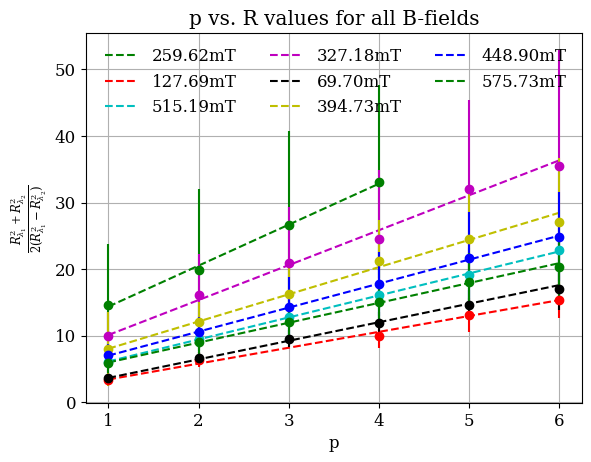

In [147]:


Bfields_exp = [] #experimental B fields
deltaLambdas = []
deltaLambda_errs = []

fig = plt.figure()
ax = fig.gca()
plt.grid()
plt.xlabel("p")
plt.ylabel(r"$\frac{R_{\lambda_1}^2 + R_{\lambda_2}^2}{2(R_{\lambda_1}^2 - R_{\lambda_2}^2)}$")
plt.title("p vs. R values for all B-fields")
for i in df['peaks'][inds].index:
    color=next(cycol)
    try:
        b,dl,dl_err = get_DeltaLambda(i,lambda0=643.8e-9,fig=fig,ax=ax,color=color)
        print(b,dl,dl_err)
        if b < 0.2:
            pass
        else:
            Bfields_exp.append(float(b))
            deltaLambdas.append(float(dl))
            deltaLambda_errs.append(float(dl_err))
    except:
        pass
plt.legend(frameon=False,ncol=3)

Bfields_exp = np.array(Bfields_exp)
deltaLambdas = np.array(deltaLambdas)
deltaLambda_errs = np.array(deltaLambda_errs)


# Calculate the bohr magneton!

In [148]:
print(Bfields_exp)
print(deltaLambdas)
print(deltaLambda_errs)

[0.25961946 0.5151864  0.32717581 0.39473216 0.4489047  0.57573219]
[5.60860079e-12 1.04455665e-11 6.57843381e-12 8.45231430e-12
 9.57795494e-12 1.15667019e-11]
[2.00592183e-13 1.14027173e-13 2.84303961e-13 3.35532651e-13
 1.01949151e-13 1.73826209e-13]


In [149]:
speedoflight = 299792458 #m/s
# for 1D2 and 1P1
S1 = 0; S2 = 0
L1 = 2; L2 = 1
J1 = 2; J2 = 1

lambda0 = 643.8e-9

ev =1.602176634*1e-19 #J
hbar = 1.054571817*1e-34 #J*s
me = 9.1093837015*1e-31 #kg

muB = -ev*hbar/2/me # theoretical value of muB J*T^(-1)
print(muB)
# 1 T = 1 kg / s^2 / A
# 1 mT = 1e-3 kg / s^2 / A

-9.2740100726798e-24


In [150]:
deltaLambda_errs

array([2.00592183e-13, 1.14027173e-13, 2.84303961e-13, 3.35532651e-13,
       1.01949151e-13, 1.73826209e-13])

In [151]:
hbar * 2 * np.pi * speedoflight / lambda0**2 * deltaLambdas[0]

np.float64(2.688000318528852e-24)

In [152]:
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'serif'
matplotlib.rcParams['mathtext.it'] = 'serif:italic'
matplotlib.rcParams['mathtext.bf'] = 'serif:bold'


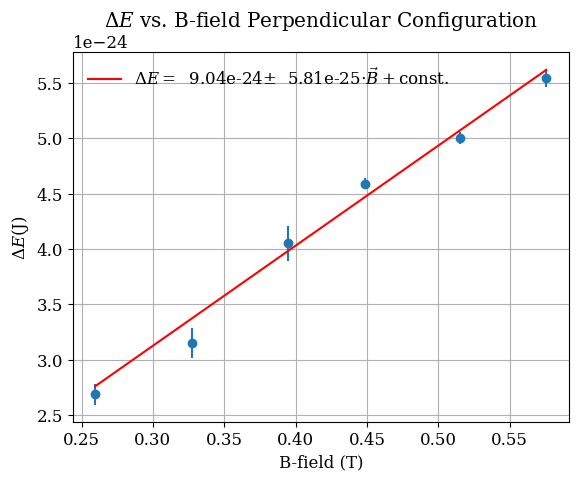

In [153]:
deltaEs_exp = hbar * 2 * np.pi * speedoflight / lambda0**2 * deltaLambdas
deltaEs_exp_errs =  deltaEs_exp * np.sqrt((deltaLambda_errs/deltaLambdas)**2) # propagate errors

plt.figure()
plt.errorbar(Bfields_exp,deltaEs_exp,yerr=deltaEs_exp_errs,fmt='o')
plt.grid()
plt.xlabel('B-field (T)')
plt.ylabel(r'$\Delta E$'+'(J)')

popt, pcov = curve_fit(
    linear_model,
    Bfields_exp,
    deltaEs_exp,
    sigma=np.abs(deltaEs_exp_errs),
    # absolute_sigma=True  # Treat sigma as absolute errors
)

# Extract fit parameters and uncertainties
deltaE_slope, deltaE_intercept = popt
deltaE_slope_err, deltaE_intercept_err = np.sqrt(np.diag(pcov))

# Generate a smooth line for plotting the fit
x_fit = np.linspace(min(Bfields_exp), max(Bfields_exp), 100)
y_fit = linear_model(x_fit, deltaE_slope, deltaE_intercept)
plt.plot(x_fit, y_fit, 'r-', label= r'$\Delta E= $'+f'{deltaE_slope:10.2e}'+r'$\pm$'+f'{deltaE_slope_err:10.2e}'+r'$\cdot \vec{B} +$const.')
plt.legend(frameon=False)
plt.title(r'$\Delta E$ vs. B-field Perpendicular Configuration')
plt.savefig('deltaE-perp-normal.png',dpi=300)

1.8890338444708915e-11 1.2083774757988264e-12
9.053458732531683e-24 5.791317949377298e-25


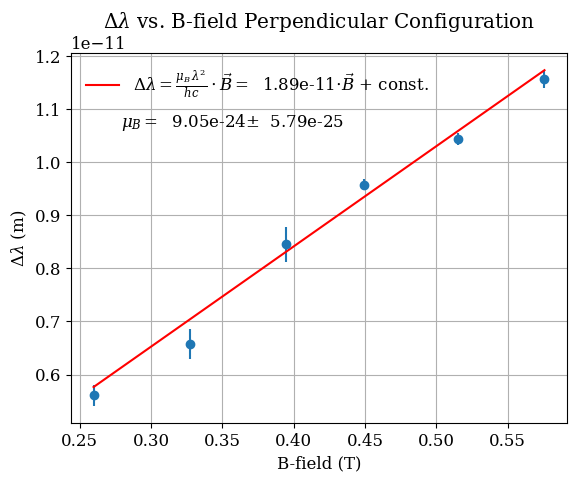

In [154]:
deltaLambdas = np.array(deltaLambdas)
deltaLambda_errs = np.array(deltaLambda_errs)
Bfields_exp_errs = deltaLambda_errs * Bfields_exp / deltaLambdas

plt.figure()
plt.errorbar(Bfields_exp,deltaLambdas,yerr=np.abs(deltaLambda_errs),fmt='o')
# plt.plot(Bfields_exp,deltaLambdas,'o')
plt.grid()
plt.xlabel('B-field (T)')
plt.ylabel(r'$\Delta \lambda$ (m)')

popt, pcov = curve_fit(
    linear_model,
    Bfields_exp,
    deltaLambdas,
    sigma=np.abs(Bfields_exp_errs),
    # absolute_sigma=True  # Treat sigma as absolute errors
)

# Extract fit parameters and uncertainties
final_slope, final_intercept = popt
final_slope_err, final_intercept_err = np.sqrt(np.diag(pcov))

# Generate a smooth line for plotting the fit
x_fit = np.linspace(min(Bfields_exp), max(Bfields_exp), 100)
y_fit = linear_model(x_fit, final_slope, final_intercept)
plt.plot(x_fit, y_fit, 'r-', label= r'$\Delta \lambda = \frac{\mu_B\,\lambda^2}{hc} \cdot \vec{B} =$'+f'{final_slope:10.2e}'+r'$\cdot \vec{B}$ + const.')
plt.legend(frameon=False)

muB_exp = final_slope * hbar * 2 * np.pi * speedoflight /(lambda0**2)
muB_exp_err = final_slope_err * hbar * 2 * np.pi * speedoflight /(lambda0**2)
print(final_slope,final_slope_err)
print(muB_exp,muB_exp_err)
plt.annotate(r'$\mu_B =$'+f'{muB_exp:10.2e}'+r'$\pm$'+f'{muB_exp_err:10.2e}',(0.1,0.8),xycoords="axes fraction")

plt.title(r'$\Delta \lambda$ vs. B-field Perpendicular Configuration')
plt.savefig('deltaLambda-perp-normal.png',dpi=300)


In [156]:
pwd

'/home/yao/Insync/yaosarayin@gmail.com/Google Drive/ens classes/code stuff/zeeman lab'

In [157]:
from zeeman_peaks import *

./new_setup/911A-p-45.xls
307
./new_setup/911A-p45.xls
305


Text(0, 0.5, 'Intensity')

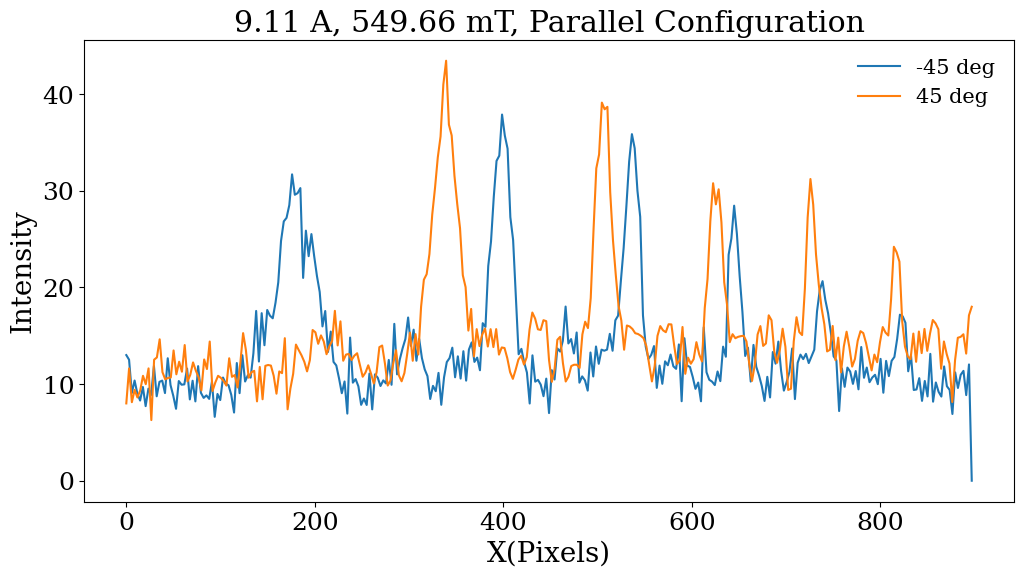

In [202]:
plt.rcParams['axes.labelsize'] = 20 # Adjust as needed

fig, ax = plt.subplots(figsize=(12,6))

for xls_file in glob('./new_setup/9*A*.xls'):

    print(xls_file)
    amp = xls_file.split('/')[-1].split('A')[0]
    pangle = xls_file.split('p')[-1].split('.')[0]
    # pangle = xls_file.split('p')[-1].split('-')[0]
    # file_path = 'pi_old_setup/907A-p0.xls'  # Replace with your actual file path

    # Load data
    x, y = load_histogram_data(xls_file)
    print(len(x))
    scale = 900/len(x)
    ax.plot(x*scale, y, label=f'{pangle} deg')

bfield = amp_to_bfield_perp_new(float(amp)*1e-2) #in Teslas!
plt.legend(frameon=False)
plt.title(f'{float(amp)*1e-2:.2f} A, {bfield*1000:.2f} mT, Parallel Configuration')
plt.xlabel('X(Pixels)')
plt.ylabel('Intensity')


# Anomalous Zeeman!

In [57]:
S1 = 1; S2 = 1
L1 = 0; L2 = 1
J1 = 1; J2 = 2

gj1 = gJ(S1,J1,L1)
gj2 = gJ(S2,J2,L2)

print(gj1,gj2)

2.0 1.5


In [ ]:
pwd